<a href="https://colab.research.google.com/github/FabioRochaPoeta/clusterizacao/blob/main/Aula_20230526_Clusteriza%C3%A7%C3%A3o_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data_scaled = scaler.fit_transform(iris["data"])

In [ ]:
import pandas as pd

df_iris_scaled = pd.DataFrame(data_scaled, columns=iris['feature_names'])

df_iris_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<Axes: >

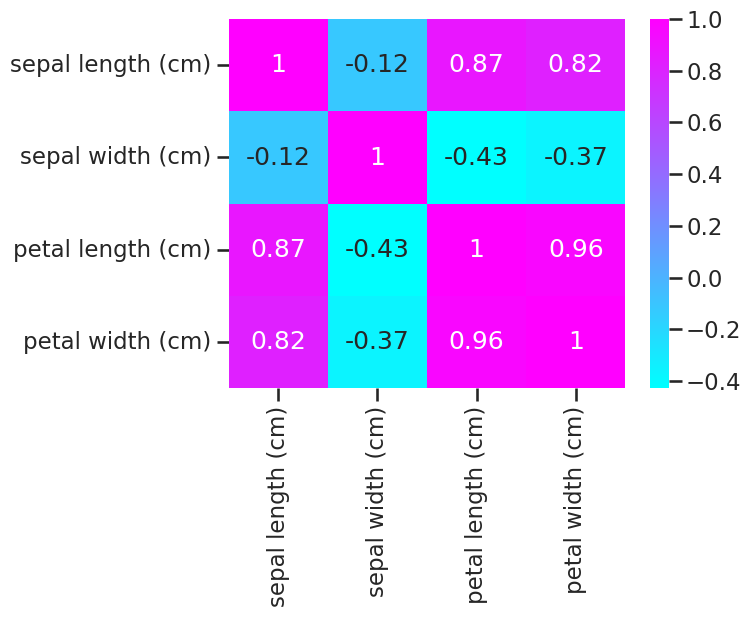

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

sns.set_context("talk")


sns.heatmap(df_iris_scaled.corr(), annot=True, cmap='cool')

In [ ]:
from sklearn.cluster import KMeans

n_clusters=3

model = KMeans(
    n_clusters=n_clusters,
    n_init=100, 
    max_iter=10000, 
    random_state=42
)

model.fit(df_iris_scaled)

clusters = model.predict(df_iris_scaled)

In [ ]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

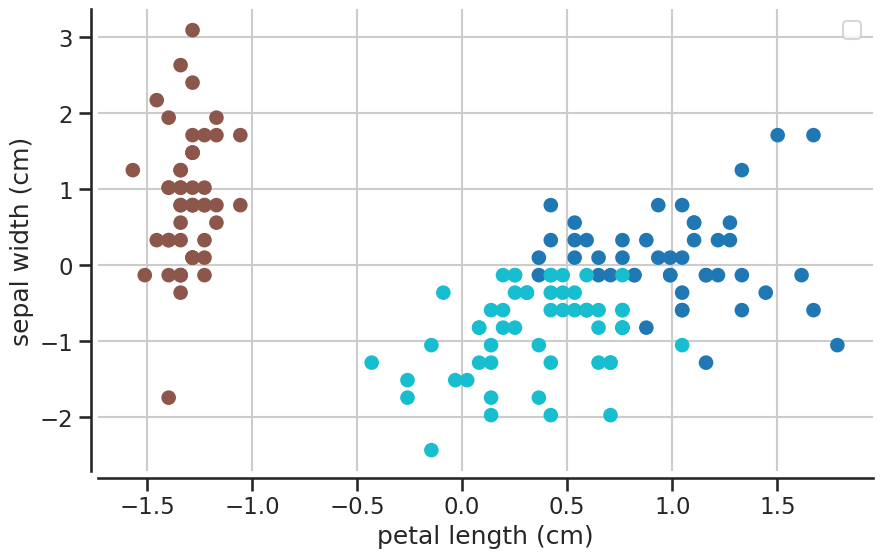

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.scatter(df_iris_scaled["petal length (cm)"],
           df_iris_scaled["sepal width (cm)"],
           c=clusters, cmap='tab10')

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("sepal width (cm)")

ax.grid(True)
ax.legend()
sns.despine(offset=5)

In [ ]:

#targets = [iris['target_names'][target] for target in iris['target']]

targets = []
for target in iris['target']:
    flower = iris['target_names'][target]
    targets.append(flower)

In [ ]:
results = pd.DataFrame.from_dict({
    'cluster': clusters,
    'target': targets
})

In [ ]:
results.groupby('target').value_counts()

target      cluster
setosa      1          50
versicolor  2          39
            0          11
virginica   0          36
            2          14
dtype: int64